# AoU - Heteroplasmy and CLL 

## Analysis and results for `Mitochondrial Heteroplasmy is a novel predictor of Chronic Lymphocytic Leukemia Risk` paper 

### Program description
- This program reads in the data set (`aou_het_cll_posted_nature_comms.rds`) that were used for `Mitochondrial Heteroplasmy is a novel predictor of Chronic Lymphocytic Leukemia Risk` paper submitted to Nature Communications on September 22, 2025. 
- Using this data set, this program runs the analysis and saves the results for the paper. 

## Load libraries  

In [31]:
# load libraries
library(data.table)
install.packages("rms")
library(rms)
library(survival)
install.packages("survminer")
library(survminer)
library(tidyverse)
install.packages("survey")
library(survey)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/packages’
(as ‘lib’ is unspecified)



## Read in data 

In [32]:
system("gsutil -u $GOOGLE_PROJECT cp aou_het_cll_posted_nature_comms.rds .")
aou <- readRDS("aou_het_cll_posted_nature_comms.rds")

Rows: 65,652
Columns: 119
$ person_id                  <chr> "1000000", "1000004", "1000091", "1000105",…
$ date_of_birth              <chr> "1957-06-15 00:00:00 UTC", "1940-06-15 00:0…
$ ethnicity                  <chr> "Not Hispanic or Latino", "Not Hispanic or …
$ sex_at_birth               <chr> "Male", "Male", "Female", "Male", "Female",…
$ dob                        <date> 1957-06-15, 1940-06-15, 1954-06-15, 1958-0…
$ date_survey                <date> 2019-08-29, 2019-07-26, 2019-07-24, 2018-0…
$ date_blood                 <date> 2019-08-29, 2019-07-26, 2019-07-25, 2018-0…
$ version                    <chr> "v8", "v6", "v6", "v8", "v6", "v7", "v8", "…
$ case                       <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0…
$ cc_sample                  <dbl> 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1…
$ death                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ date_death                 <date> 2023-10-01, 2023-10-01, 2023-10-01, 2023-1…
$ cvd_yn      


    0     1 
65561    91 

# Descriptive statistics 

- The descriptive statistics are based on only those who were randomly selected into the studey (`cc_sample == 1`)

In [49]:
aou <- aou |> 
    mutate(exc = ifelse(case == 1 & cancer_dx_hemato_cll_any == 0, 1, 0)) |> 
    filter(exc == 0)

aou_cc <-
    aou |> 
    filter(cc_sample == 1)
aou_cc |> 
    summarise(n = n())

table(aou_cc$het_yn, useNA = "ifany")
table(aou_cc$count_het, useNA = "ifany")
summary(aou_cc$count_het)
summary(aou_cc$mMSS)
summary(aou_cc$tt_cll)
table(aou_cc$smk_ever, useNA = "ifany")

n
<int>
40930



    0     1 
29866 11064 


    0     1     2     3     4     5 
29866  8978  1709   311    56    10 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3323  1.0000  5.0000 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.00000 0.00000 0.04096 0.00000 2.57874 

Time differences in days
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     16     601    1426    1192    1676    2312 


    0     1 
25534 15396 

# Supplementary Figure 3 a-c

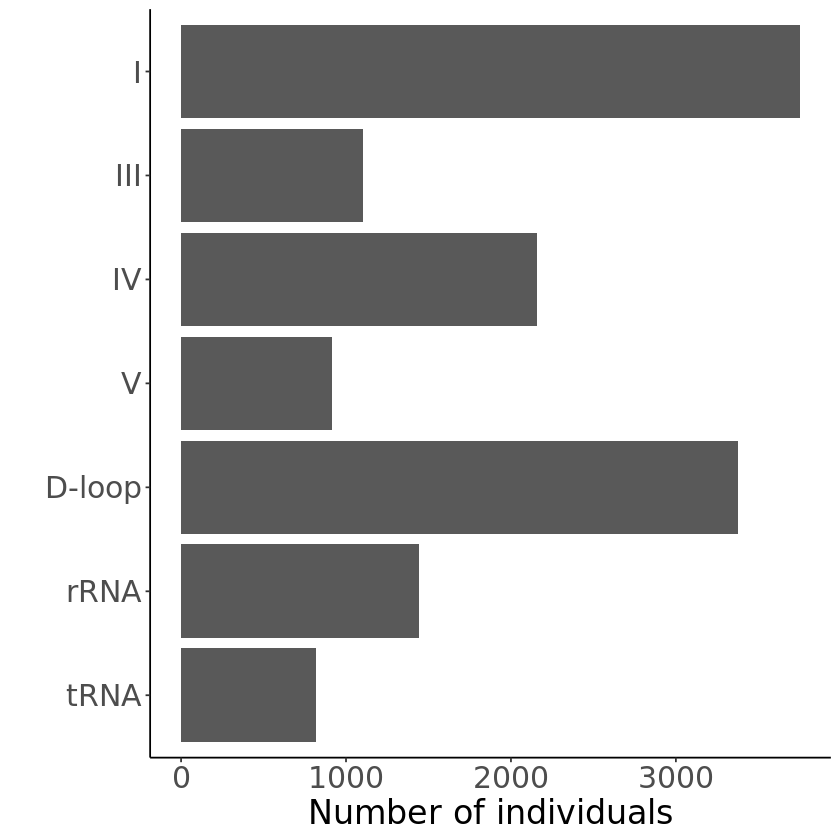

In [50]:
fig_a <- aou_cc |> 
  filter(count_het > 0) |> 
  dplyr::select(starts_with("count_het_complex_")) |> 
  pivot_longer(
      cols = starts_with("count_het_complex_"), 
      names_to = "complex", 
      values_to = "count") |> 
  mutate(complex = str_remove(complex, "count_het_complex_")) |> 
  filter(complex != "NONE") |> 
  mutate(
      complex = factor(
          complex, 
          levels = rev(c("I", "III", "IV", "V", "DLOOP", "RRNA", "TRNA")), 
          labels = rev(c("I", "III", "IV", "V", "D-loop", "rRNA", "tRNA"))
      )
  ) |> 
  group_by(complex) |> 
  summarise(n = sum(count)) |> 
  ungroup() |>
  ggplot() +
  geom_col(aes(x = n, y = complex)) +
  theme_classic() +
  scale_x_continuous("Number of individuals") +
  scale_y_discrete("") + 
  theme(
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 18), 
      legend.position = "top"
  )
fig_a
ggsave(plot = fig_a, "aou_het_cll_sf1a_2025_08_25.pdf", width = 10, height = 5)

In [51]:
aou_cc |> 
  filter(count_het > 0) |> 
  dplyr::select(starts_with("count_het_complex_")) |> 
  pivot_longer(
      cols = starts_with("count_het_complex_"), 
      names_to = "complex", 
      values_to = "count") |> 
  mutate(complex = str_remove(complex, "count_het_complex_")) |> 
#   filter(complex != "NONE") |> 
  mutate(
      complex = factor(
          complex, 
          levels = rev(c("I", "III", "IV", "V", "DLOOP", "RRNA", "TRNA")), 
          labels = rev(c("I", "III", "IV", "V", "D-loop", "rRNA", "tRNA"))
      )
  ) |> 
  group_by(complex) |> 
  summarise(n = sum(count))

complex,n
<fct>,<int>
tRNA,816
rRNA,1442
D-loop,3379
V,916
IV,2155
III,1105
I,3752
NA,40


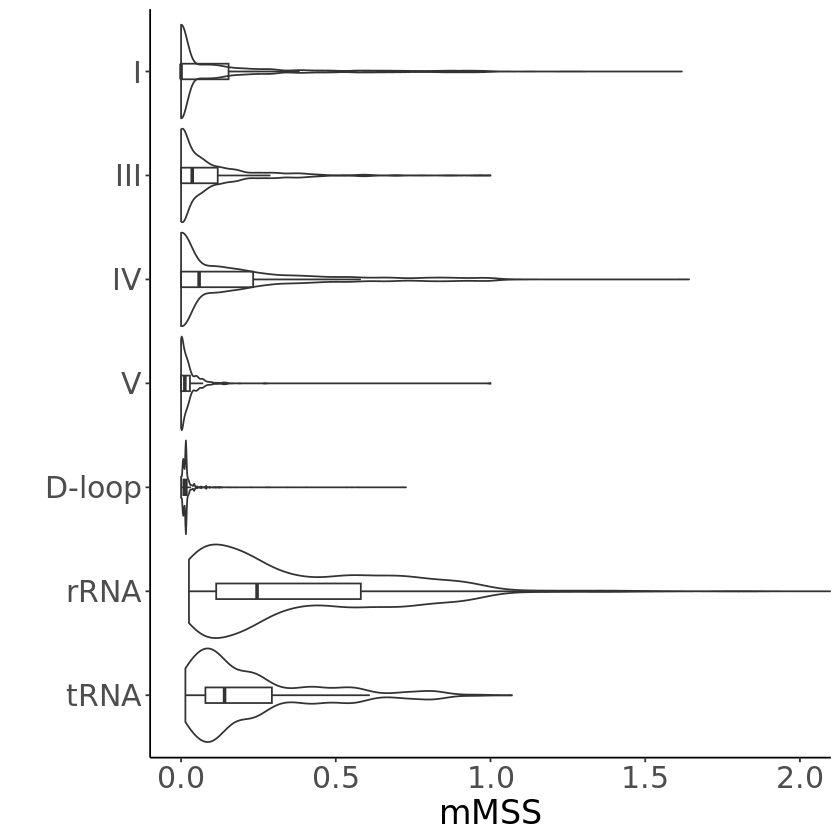

In [52]:
fig_b <- aou_cc |> 
  mutate(
      mMSS_complex_I = ifelse(count_het_complex_I == 0, NA, mMSS_complex_I), 
      mMSS_complex_III = ifelse(count_het_complex_III == 0, NA, mMSS_complex_III), 
      mMSS_complex_IV = ifelse(count_het_complex_IV == 0, NA, mMSS_complex_IV),  
      mMSS_complex_V = ifelse(count_het_complex_V == 0, NA, mMSS_complex_V), 
      mMSS_complex_DLOOP = ifelse(count_het_complex_DLOOP == 0, NA, mMSS_complex_DLOOP), 
      mMSS_complex_RRNA = ifelse(count_het_complex_RRNA == 0, NA, mMSS_complex_RRNA), 
      mMSS_complex_TRNA = ifelse(count_het_complex_TRNA == 0, NA, mMSS_complex_TRNA)
  ) |> 
  dplyr::select(starts_with("mMSS_complex_")) |> 
  pivot_longer(
      cols = starts_with("mMSS_complex_"), 
      names_to = "complex", 
      values_to = "mMSS") |> 
  mutate(complex = str_remove(complex, "mMSS_complex_")) |> 
  filter(complex != "NONE") |> 
  mutate(
      complex = factor(
          complex, 
          levels = rev(c("I", "III", "IV", "V", "DLOOP", "RRNA", "TRNA")), 
          labels = rev(c("I", "III", "IV", "V", "D-loop", "rRNA", "tRNA"))
      )
  ) |> 
  filter(!is.na(mMSS)) |> 
  ggplot() + 
  geom_violin(aes(x = mMSS, y = complex), scale = "width") +
  geom_boxplot(aes(x = mMSS, y = complex), alpha = 0, width = 0.15)+
  theme_classic()+
  coord_cartesian(xlim = c(0, 2))+
  scale_x_continuous("mMSS", breaks = c(0, 0.5, 1, 1.5, 2)) +
  scale_y_discrete("") + 
  theme(
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 18),
      legend.position = "top"
  )
fig_b
ggsave(plot = fig_b, "aou_het_cll_sf1b_2025_08_25.pdf", width = 10, height = 5)

In [53]:
aou_cc |> 
  mutate(
      mMSS_complex_I = ifelse(count_het_complex_I == 0, NA, mMSS_complex_I), 
      mMSS_complex_III = ifelse(count_het_complex_III == 0, NA, mMSS_complex_III), 
      mMSS_complex_IV = ifelse(count_het_complex_IV == 0, NA, mMSS_complex_IV),  
      mMSS_complex_V = ifelse(count_het_complex_V == 0, NA, mMSS_complex_V), 
      mMSS_complex_DLOOP = ifelse(count_het_complex_DLOOP == 0, NA, mMSS_complex_DLOOP), 
      mMSS_complex_RRNA = ifelse(count_het_complex_RRNA == 0, NA, mMSS_complex_RRNA), 
      mMSS_complex_TRNA = ifelse(count_het_complex_TRNA == 0, NA, mMSS_complex_TRNA)
  ) |> 
  dplyr::select(starts_with("mMSS_complex_")) |> 
  pivot_longer(
      cols = starts_with("mMSS_complex_"), 
      names_to = "complex", 
      values_to = "mMSS") |> 
  mutate(complex = str_remove(complex, "mMSS_complex_")) |> 
  filter(complex != "NONE") |> 
  mutate(
      complex = factor(
          complex, 
          levels = rev(c("I", "III", "IV", "V", "DLOOP", "RRNA", "TRNA")), 
          labels = rev(c("I", "III", "IV", "V", "D-loop", "rRNA", "tRNA"))
      )
  ) |> 
  filter(!is.na(mMSS)) |> 
  group_by(complex) |> 
  summarise(
      median = median(mMSS), 
      q25 = quantile(mMSS, 0.25), 
      q75 = quantile(mMSS, 0.75)
  )

complex,median,q25,q75
<fct>,<dbl>,<dbl>,<dbl>
tRNA,0.14057446,0.078669358,0.29350745
rRNA,0.24556954,0.113524458,0.58091919
D-loop,0.01493302,0.007379266,0.01741916
V,0.01221116,0.000000000,0.02864931
IV,0.05833051,0.000000000,0.23291477
III,0.03608902,0.000000000,0.11844226
I,0.00000000,0.000000000,0.15348127


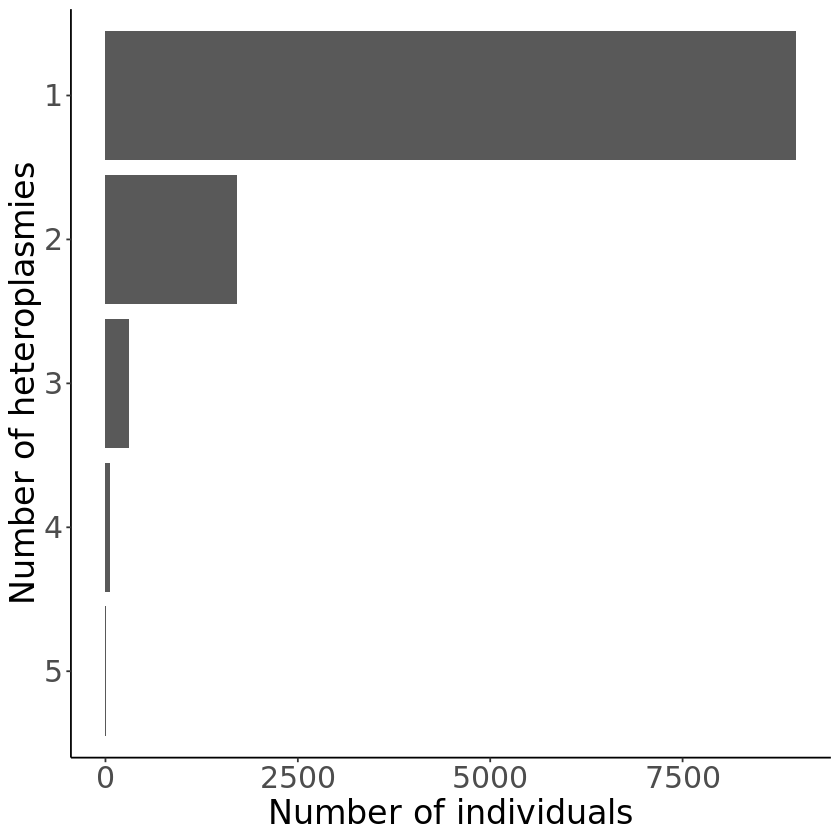

In [54]:
fig_c <- aou_cc |> 
  group_by(count_het) |>
  summarize(n = n()) |> 
  ungroup() |>
  filter(count_het >= 1) |> 
  ggplot() +
  geom_col(aes(x = n, y = reorder(count_het, -count_het))) +
  theme_classic() +
  scale_x_continuous("Number of individuals") +
  scale_y_discrete("Number of heteroplasmies") +
  theme(
      axis.title = element_text(size = 20), 
      axis.text = element_text(size = 18), 
      legend.position = "top"
  )
fig_c
ggsave(plot = fig_c, "aou_het_cll_sf1c_2025_08_25.pdf", width = 10, height = 5)

In [55]:
aou_cc |> 
    filter(count_het > 0) |> 
    janitor::tabyl(count_het)
8978+1709+311+56+10
1-(8978/(8978+1709+311+56+10))
1709+311+56+10

count_het,n,percent
<int>,<int>,<dbl>
1,8978,0.8114605929
2,1709,0.1544649313
3,311,0.0281091829
4,56,0.0050614606
5,10,0.0009038322


[1] 11064

[1] 0.1885394

[1] 2086

In [56]:
# baseline characteristics by heteroplasmy yes/no
aou_cc |> 
    group_by(het_yn) |> 
    summarise(
        median = median(age), 
        q25 = quantile(age, 0.25), 
        q75 = quantile(age, 0.75)
    )
wilcox.test(aou_cc$age ~ aou_cc$het_yn)

table(aou_cc$het_yn, aou_cc$genetic_sex, useNA = "ifany")
print(prop.table(table(aou_cc$het_yn, aou_cc$genetic_sex)[1, ])*100)
print(prop.table(table(aou_cc$het_yn, aou_cc$genetic_sex)[2, ])*100)
print(fisher.test(aou_cc$het_yn, aou_cc$genetic_sex)[[1]])

table(aou_cc$het_yn, useNA = "ifany")
aou_cc |> janitor::tabyl(het_yn, genetic_sex, sort = TRUE) |>
  janitor::adorn_totals(where = c("row", "col")) |> 
  janitor::adorn_percentages("row") |>
  janitor::adorn_pct_formatting(digits = 2) |>
  janitor::adorn_ns(position = "front") 

het_yn,median,q25,q75
<dbl>,<dbl>,<dbl>,<dbl>
0,48.16290,34.05065,60.67899
1,52.45996,36.35318,64.66461



	Wilcoxon rank sum test with continuity correction

data:  aou_cc$age by aou_cc$het_yn
W = 147273364, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


   
        0     1
  0 19218 10648
  1  6979  4085

       0        1 
64.34742 35.65258 
       0        1 
63.07845 36.92155 
[1] 0.01802353



    0     1 
29866 11064 

,het_yn,0,1,Total
,<chr>,<chr>,<chr>,<chr>
1,0,"19,218 (64.35%)","10,648 (35.65%)","29,866 (100.00%)"
2,1,"6,979 (63.08%)","4,085 (36.92%)","11,064 (100.00%)"
3,Total,"26,197 (64.00%)","14,733 (36.00%)","40,930 (100.00%)"


In [57]:
table(aou_cc$het_yn, aou_cc$smk_ever, useNA = "ifany")
print(prop.table(table(aou_cc$smk_ever, aou_cc$het_yn)[1, ])*100)
print(prop.table(table(aou_cc$smk_ever, aou_cc$het_yn)[2, ])*100)
print(fisher.test(aou_cc$smk_ever, aou_cc$het_yn)[[1]])

aou_cc |> janitor::tabyl(het_yn, smk_ever, sort = TRUE) |>
  janitor::adorn_totals(where = c("row", "col")) |> 
  janitor::adorn_percentages("row") |>
  janitor::adorn_pct_formatting(digits = 2) |>
  janitor::adorn_ns(position = "front") 

   
        0     1
  0 18787 11079
  1  6747  4317

       0        1 
73.57641 26.42359 
       0        1 
71.96025 28.03975 
[1] 0.0003692678


,het_yn,0,1,Total
,<chr>,<chr>,<chr>,<chr>
1,0,"18,787 (62.90%)","11,079 (37.10%)","29,866 (100.00%)"
2,1,"6,747 (60.98%)","4,317 (39.02%)","11,064 (100.00%)"
3,Total,"25,534 (62.38%)","15,396 (37.62%)","40,930 (100.00%)"


In [58]:
aou_cc |> 
mutate(hc_all = count_het_complex_I + count_het_complex_TRNA + count_het_complex_III + count_het_complex_DLOOP + 
      count_het_complex_RRNA + count_het_complex_V + count_het_complex_IV + count_het_complex_NONE) |> 
filter(hc_all != count_het) |> 
dplyr::select(person_id, starts_with("count_het"), hc_all)

# check if these are the people with overlapping regions

person_id,count_het,count_het_complex_I,count_het_complex_TRNA,count_het_complex_III,count_het_complex_DLOOP,count_het_complex_RRNA,count_het_complex_V,count_het_complex_IV,count_het_complex_NONE,hc_all
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2909846,1,0,1,1,0,0,0,0,0,2
6919000,2,1,1,0,0,1,0,0,0,3
